<h2 style="font-weight:700;">ЛАБОРАТОРНАЯ РАБОТА №4</h2>

<p style="font-weight:600;">РЕШЕНИЕ ЗАДАЧИ МНОГОМЕРНОЙ РЕГРЕССИИ</p>

<p style="font-weight:600">Цели и задачи работы</p>

<p><span style="font-weight:600;">Цель лабораторной работы:</span> изучение принципов решения задачи многомерной
регрессии с использованием методов машинного обучения.<p>
<span style="font-weight:600;">Основные задачи:</span>
<ul>
<li>изучение инструментария Python для реализации алгоритмов многомерной
регрессии;</li>
<li>освоение метода линейной регрессии;</li>
<li>изучение методов оценки корректности модели многомерной линейной
регрессии;</li></ul>

<p>В своей работе я использую датасет concrete.csv (прочность бетона). Набор данных предоставляет информацию о прочности бетона на сжатие, кото-
рый является наиболее важным материалом в гражданском строительстве, в зависи-
мости от его компонентов и возраста.</p>

<p style="font-weght:600;">Атрибуты:</p>
<ul>
<li>Cement (component 1) – kg in a m3 mixture</li>
<li>Blast Furnace Slag (component 2) – kg in a m3 mixture</li>
<li>Fly Ash (component 3) – kg in a m3 mixture</li>
<li>Water (component 4) – kg in a m3 mixture</li>
<li>Superplasticizer (component 5) – kg in a m3 mixture</li>
<li>Coarse Aggregate (component 6) – kg in a m3 mixture</li>
<li>Fine Aggregate (component 7) – kg in a m3 mixture</li>
<li>Age – Day (1~365)</li>
<li>Concrete compressive strength – MPa (целевая переменная)</li>
</ul>

<h2>1. Импортируем библиотеки и загружаем данные</h2>

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv("concrete.csv")
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


<h2>Получим информацию о датасете</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


<h2>Проверим наличие пропущенных значений и выбросо</h2>

In [5]:

print(df.isnull().sum())

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


<h2>
Заменяем категориальные значения числовыми</h2>

<p>В наборе данных concrete.csv отсутствуют категориальные признаки.
Все атрибуты представлены числовыми величинами, поэтому этап кодирования
категориальных признаков я выполнять не буду.</p>

<h2>
Разделяем данные на признаки и целевую переменную</h2>

In [8]:
# целевая переменная
y = df['strength']

# признаки
X = df.drop('strength', axis=1)

# проверка типов
type(X), type(y)


(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [9]:

X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


<h2>Разделяем данные на признаки и целевую переменную</h2>

In [25]:

# X — признаки, y — целевая переменная
X = df.drop('strength', axis=1)
y = df['strength']

# разбиение на обучающую и тестовую выборки (75% / 25%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)


<h2>Масштабируем признаки (StandardScaler)</h2>

In [30]:
from sklearn.preprocessing import StandardScaler

# создаём объект StandardScaler
scaler = StandardScaler()

# масштабируем обучающую выборку
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку (используем параметры, вычисленные на обучающей)
X_test_scaled = scaler.transform(X_test)


<h2>
Обучаем модель линейной регрессии</h2>

In [27]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


<h2>Делаем прогноз на тестовой выборке</h2>

In [31]:
y_pred = model.predict(X_test_scaled)

# первые 5 предсказанных значений
y_pred[:5]


array([25.33374599, 25.16226003, 17.29028657, 40.29891082, 56.95443286])

<h2>Оценка качества модели</h2>

In [33]:
#RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 10.625290975269614


In [34]:
#R²
r2 = r2_score(y_test, y_pred)
print('R2:', round(r2, 2))

R2: 0.6


In [35]:
#Оценка через метод .score()
model.score(X_test_scaled, y_test)

0.5982240239819626

<h2>Итоговое уравнение регрессии</h2>

In [36]:
# коэффициенты модели
print('Coefficients: ', model.coef_)

# свободный член (intercept)
print('Intercept: ', model.intercept_)

Coefficients:  [11.71362629  7.98542385  5.19153582 -3.67162313  1.99330241  1.03852849
  1.04245303  7.35697805]
Intercept:  35.994300518134715


<h2>Оценка влияния признаков</h2>

In [37]:
# корреляция признаков с целевой переменной
df.corr()['strength'].sort_values(ascending=False)

strength        1.000000
cement          0.497832
superplastic    0.366079
age             0.328873
slag            0.134829
ash            -0.105755
coarseagg      -0.164935
fineagg        -0.167241
water          -0.289633
Name: strength, dtype: float64

<h2>Визуализация результатов регрессии</h2>

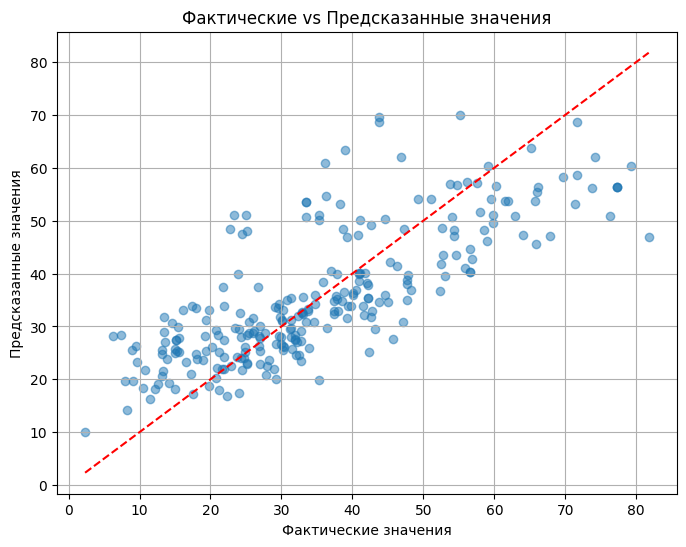

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные значения")
plt.grid(True)
plt.show()


<p>Красная пунктирная линия — идеально совпадение фактических и предсказанных значений.
Чем ближе точки к линии, тем лучше модель предсказывает.</p>

<h2>Остатки регрессии (Residuals Plot)</h2>

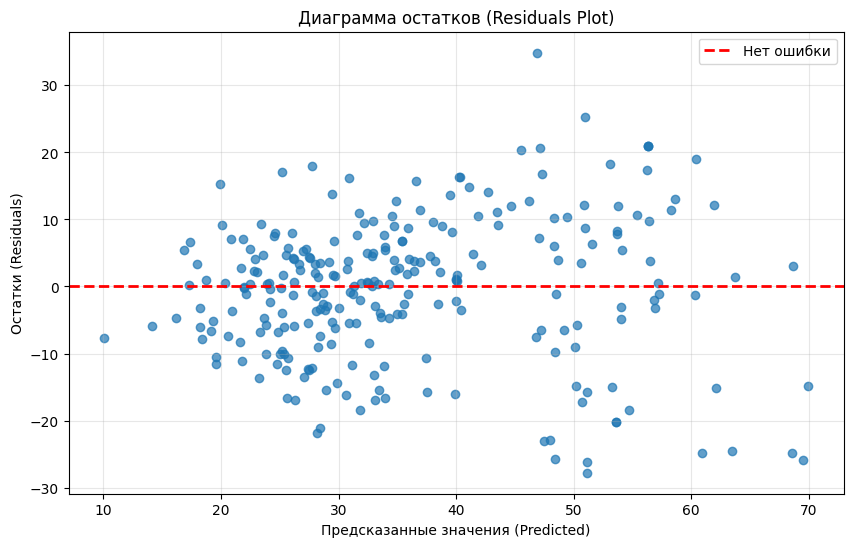

In [39]:
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Нет ошибки')
plt.xlabel("Предсказанные значения (Predicted)")
plt.ylabel("Остатки (Residuals)")
plt.title("Диаграмма остатков (Residuals Plot)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


<p>Остатки показывают разницу между фактическими и предсказанными значениями.
Если точки распределены случайно вокруг нуля → модель адекватна.</p>